![APSSDC-LOGO](https://drive.google.com/uc?export=download&id=15AKQ6_-BixW4K6mL6RPphF5EKXqYF2zj)

<h1><center>Day08 Machine Learning Using Python</center></h1>

## Day08 Objectives

- Random Forest Classifier
- Unsupervised Learning
- Clustering
- Types of Clustering
- KMeans Clustering

## Random Forest

Random forest (or random forests) is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.
- The term came from random decision forests that was first proposed by **Tin Kam Ho** of Bell Labs in 1995.
- The method combines **Breiman's** "bagging" idea and the random selection of features.

## Features and Advantages

The advantages of random forest are:
- It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier.
- It runs efficiently on large databases.
- It can handle thousands of input variables without variable deletion.
- It gives estimates of what variables are important in the classification.
- It generates an internal unbiased estimate of the generalization error as the forest building progresses.


### [Telecom Churn](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Orange_Telecom_Churn_Data.csv)

In [1]:
import sklearn

sklearn.__version__

'0.23.1'

In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(url)

In [3]:
data.shape

(5000, 21)

In [4]:
data.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,415,415,415,408,415
phone_number,382-4657,371-7191,358-1921,375-9999,330-6626
intl_plan,no,no,no,yes,yes
voice_mail_plan,yes,yes,no,no,no
number_vmail_messages,25,26,0,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7
total_day_calls,110,123,114,71,113
total_day_charge,45.07,27.47,41.38,50.9,28.34


In [5]:
data.churned.value_counts()

False    4293
True      707
Name: churned, dtype: int64

In [6]:
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [7]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [8]:
data.drop(['state', 'area_code', 'phone_number'], inplace = True, axis = 'columns')

data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


del data[['state', 'area_code', 'phone_number']]

In [9]:
for i in ['intl_plan','voice_mail_plan']:
    data[i] = data[i].replace({'yes':True, 'no': False}).astype(bool)
    
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
X = data.drop('churned', axis = 'columns')
Y = data['churned']

In [11]:
from sklearn.model_selection import train_test_split


x_tr, x_tt, y_tr, y_tt = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(n_estimators=150, n_jobs = -1, random_state = 42)

In [14]:
model.fit(x_tr, y_tr)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [15]:
pred_tt = model.predict(x_tt)
pred_tr = model.predict(x_tr)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(pred_tr, y_tr)

array([[3000,    0],
       [   0,  500]], dtype=int64)

In [17]:
confusion_matrix(pred_tt, y_tt)

array([[1284,   48],
       [   9,  159]], dtype=int64)

In [18]:
y_tt.shape

(1500,)

In [19]:
accuracy_score(pred_tt, y_tt)

0.962

In [20]:
imp = model.feature_importances_

<BarContainer object of 17 artists>

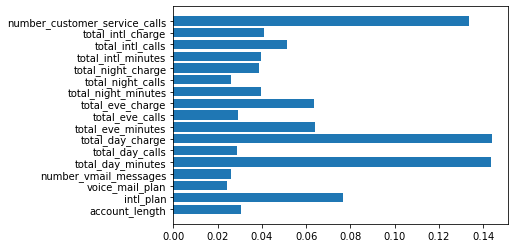

In [21]:
import matplotlib.pyplot as plt


plt.barh(X.columns, imp)

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

### Using k-means for customer segmentation

### [KMeans_Clustering Visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

### [Customer Dataset](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Clustering/Cust_Segmentation.csv)

In [22]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Clustering/Cust_Segmentation.csv')

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [23]:
df.drop(['Customer Id', 'Address', 'Defaulted'], axis = 'columns', inplace = True)

In [24]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [25]:
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled = ss.fit_transform(df)

scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

In [27]:
scaled.mean()

-5.642545254565501e-17

In [28]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=3)

In [30]:
model.fit(scaled)

KMeans(n_clusters=3)

In [31]:
clusters = model.predict(scaled)

clusters

array([0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,

In [32]:
df['cluster'] = clusters

In [33]:
df.groupby('cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
cluster,,,,,,,
0,30.167689,1.693252,4.513292,28.411043,0.885673,1.793601,9.664008
1,40.933333,2.213333,15.666667,111.546667,6.337947,10.814293,18.648000
2,41.793706,1.608392,13.632867,60.891608,1.509990,3.247601,8.816783


Text(0.5, 1.0, 'cluster0 vs cluster2')

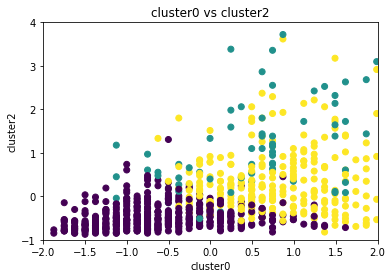

In [50]:
import matplotlib.pyplot as plt

plt.scatter(scaled[:,0], scaled[:,3], c = clusters.astype(float))
plt.xlabel('cluster0')
plt.ylabel('cluster2')
plt.ylim(-1,4)
plt.xlim(-2,2)
plt.title('cluster0 vs cluster2')

3700.974470278356